In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
!pip install pmdarima

import pmdarima as pm

In [16]:
!pip install statsmodels

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [17]:
df = pd.read_csv('sp500sub.csv', index_col = 'Date', parse_dates = True)

In [18]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46124 entries, 2010-01-04 to 2015-03-23
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       46124 non-null  float64
 1   High       46124 non-null  float64
 2   Low        46123 non-null  float64
 3   Close      46123 non-null  float64
 4   Adj Close  46123 non-null  float64
 5   Volume     46123 non-null  float64
 6   Name       46123 non-null  object 
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,46124.0,8.730442e+01,1.362047e+02,1.62,2.430083e+01,5.795000e+01,9.752000e+01,1.271000e+03
High,46124.0,8.811705e+01,1.373521e+02,1.69,2.457774e+01,5.850000e+01,9.831000e+01,1.273890e+03
Low,46123.0,8.645630e+01,1.349879e+02,1.61,2.401000e+01,5.734000e+01,9.656000e+01,1.249020e+03
Close,46123.0,8.730384e+01,1.361917e+02,1.62,2.431753e+01,5.800000e+01,9.748000e+01,1.268330e+03
Adj Close,46123.0,7.881680e+01,1.360074e+02,1.62,1.954221e+01,4.837000e+01,8.557644e+01,1.268330e+03
Volume,46123.0,5.719137e+06,1.089838e+07,0.00,1.390450e+06,3.124900e+06,6.183500e+06,3.250584e+08


In [28]:
goog = df[df['Name'] == 'GOOG'][['Close']].copy()

<Axes: xlabel='Date'>

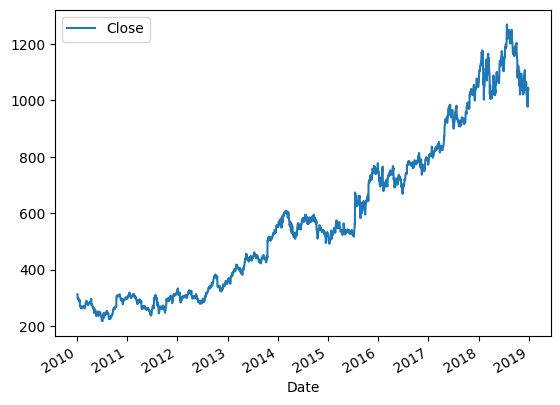

In [29]:
goog.plot()

In [30]:
def log_ret(price):
  log_price = np.log(price)
  return log_price.diff()

In [31]:
goog['LogRet'] = log_ret(goog['Close'])

In [32]:
goog.head()

,Close,LogRet
Date,,
2010-01-04,312.204773,NaN
2010-01-05,310.829926,-0.004413
2010-01-06,302.994293,-0.025532
2010-01-07,295.940735,-0.023555
2010-01-08,299.885956,0.013243


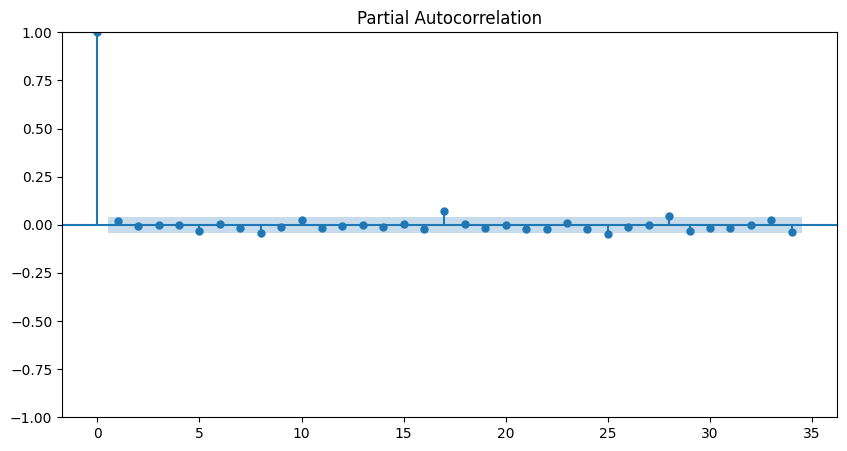

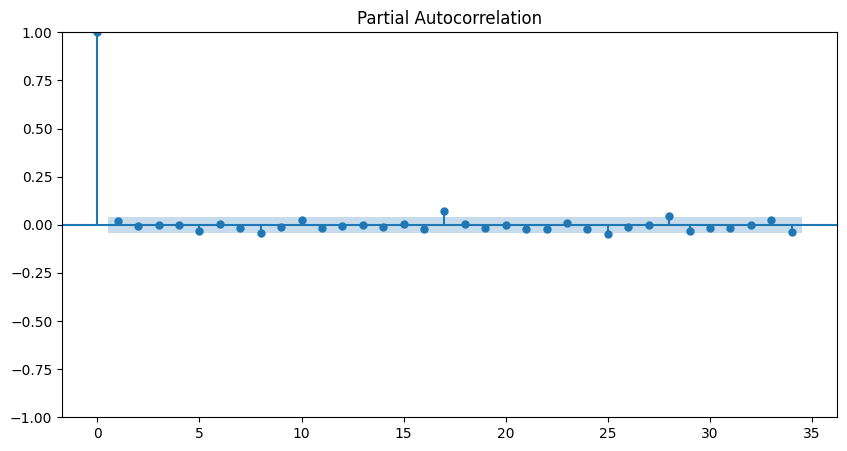

In [33]:
fig, ax = plt.subplots(figsize = (10,5))
plot_pacf(goog['LogRet'].dropna(), ax = ax)

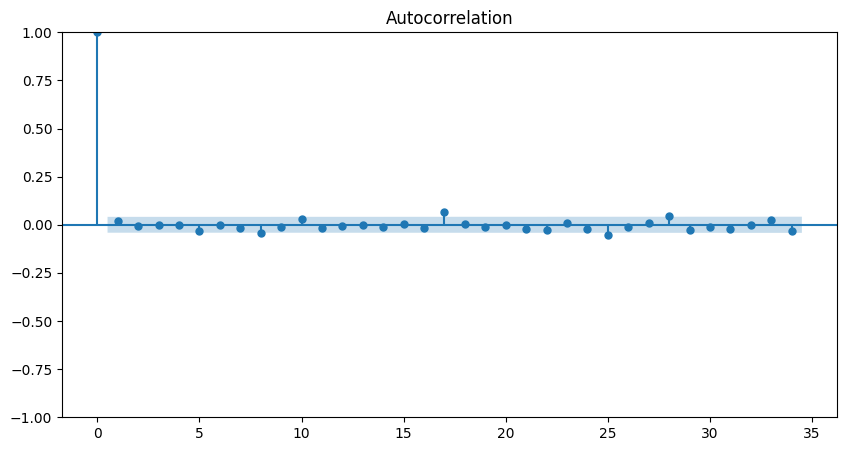

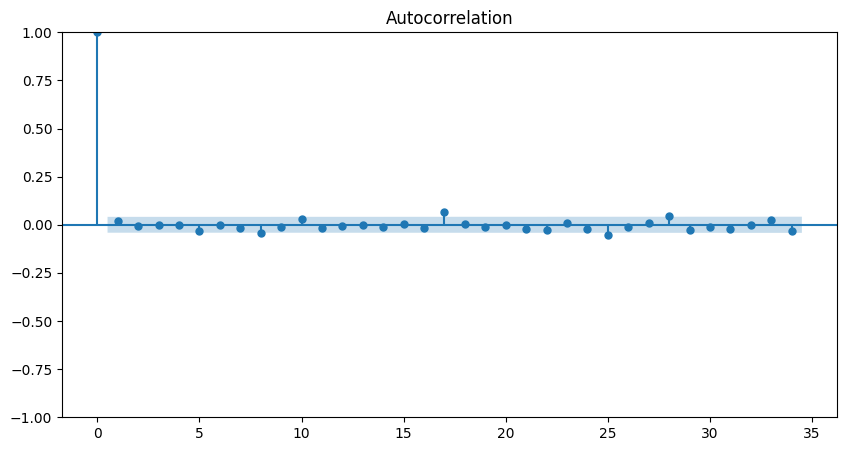

In [34]:
fig, ax = plt.subplots(figsize = (10,5))
plot_acf(goog['LogRet'].dropna(), ax = ax)